In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
import os
import librosa
import librosa.display
from IPython.display import Audio
from pylab import rcParams



In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\dell\Downloads\TESS Toronto emotional speech set data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_beg_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_bite_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_boat_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_bone_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_book_angry.wav
C:\Users\dell\Downloads\TESS Toronto emotional speech set data\OAF_angry\OAF_bough

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk(r'C:\Users\dell\Downloads\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print ('Data set is Loaded')        
        
       

Data set is Loaded


In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
paths[:5]

['C:\\Users\\dell\\Downloads\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\dell\\Downloads\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\dell\\Downloads\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\dell\\Downloads\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\dell\\Downloads\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

# creating table to organize data


In [6]:
## create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\dell\Downloads\TESS Toronto emotional...,angry
1,C:\Users\dell\Downloads\TESS Toronto emotional...,angry
2,C:\Users\dell\Downloads\TESS Toronto emotional...,angry
3,C:\Users\dell\Downloads\TESS Toronto emotional...,angry
4,C:\Users\dell\Downloads\TESS Toronto emotional...,angry


# how many catagerious of same label are present


In [7]:
df['label'].value_counts()   


label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

# PLOT GRAPHS


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# column as categories.


In [9]:
df['label'] = df['label'].astype('category')

# Plot graph to shows how many times each category appears in the 'label' column of our table.


<Axes: xlabel='label', ylabel='count'>

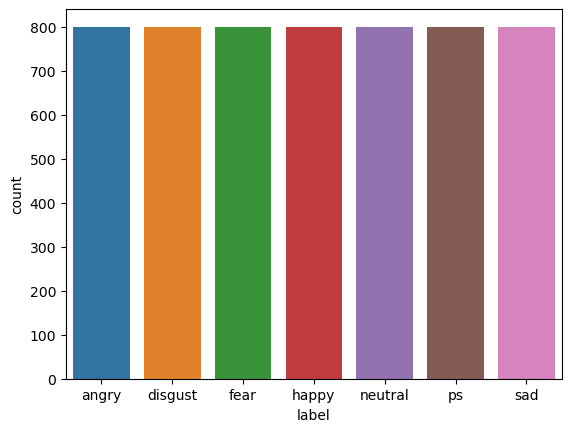

In [10]:
sns.countplot(x='label', data=df)

# Visualize and analyze audio data


//allows to play audio files

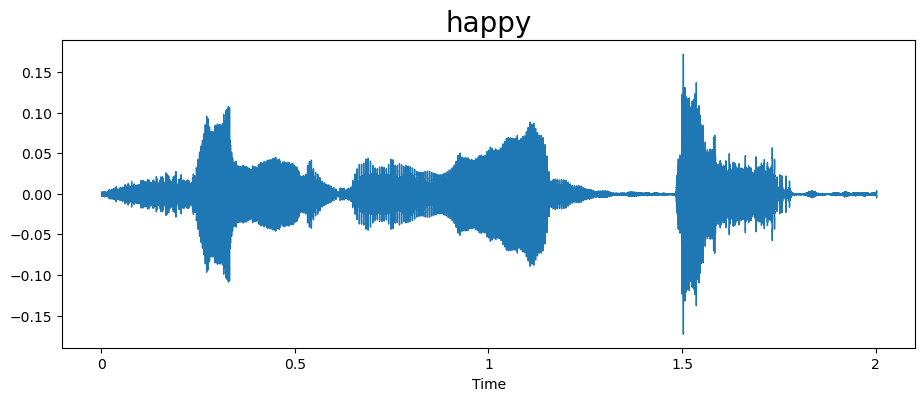

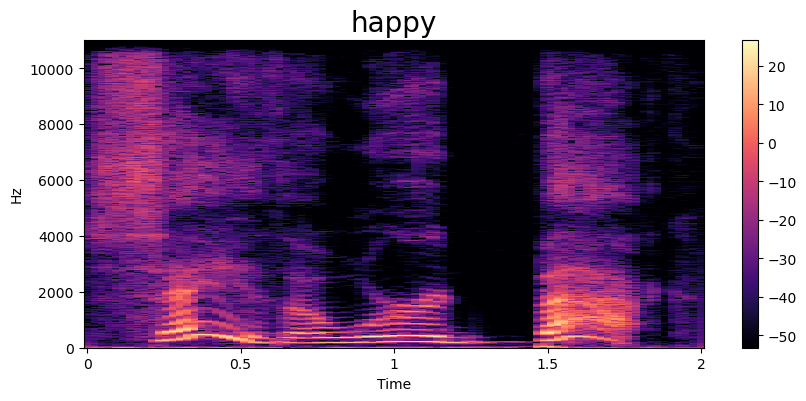

In [11]:
import librosa
import librosa.display                        
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time' , y_axis='hz')
    plt.colorbar()

# Assuming you have already defined 'df' and 'emotion'
emotion = "happy"  # Replace with the actual emotion label
path = df[df['label'] == emotion]['speech'].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

# Exploring audio data associated with the emotion of anger


//displays its waveform and spectrogram plots,and allows us to listen to it



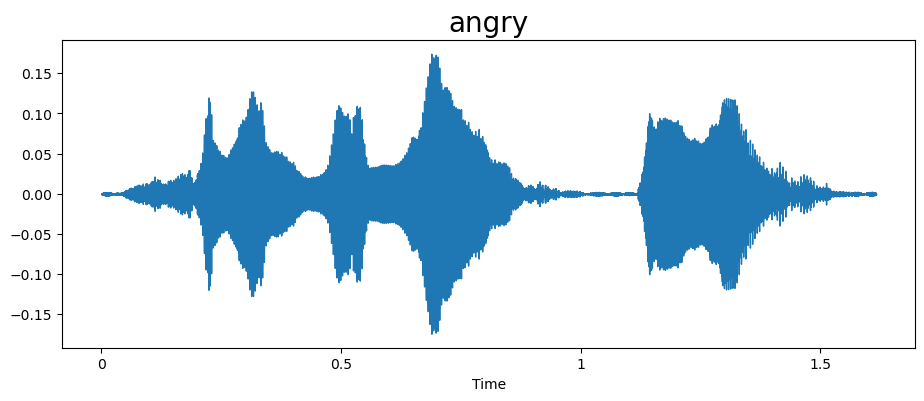

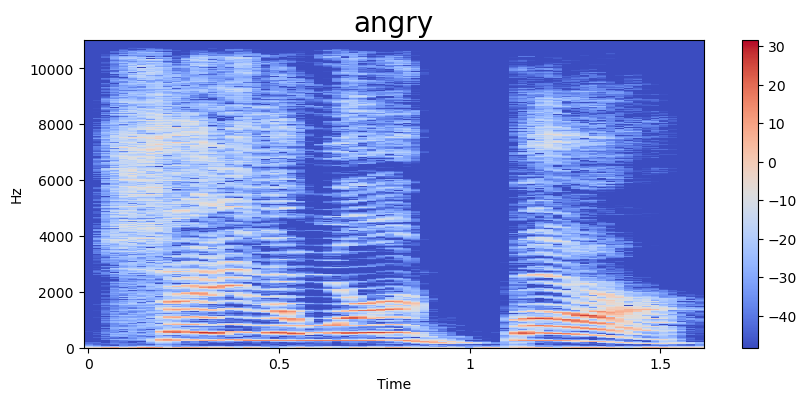

In [12]:
emotion = 'angry'
path = df[df['label'] == emotion]['speech'].values[1]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

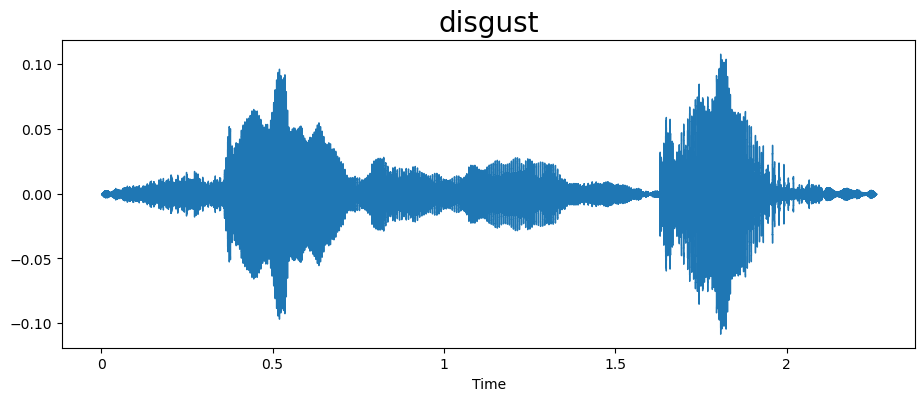

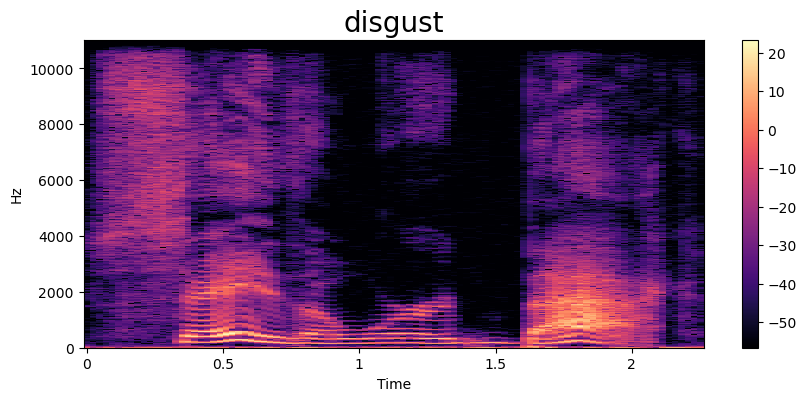

In [13]:
emotion = 'disgust'
path = df[df['label'] == emotion]['speech'].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

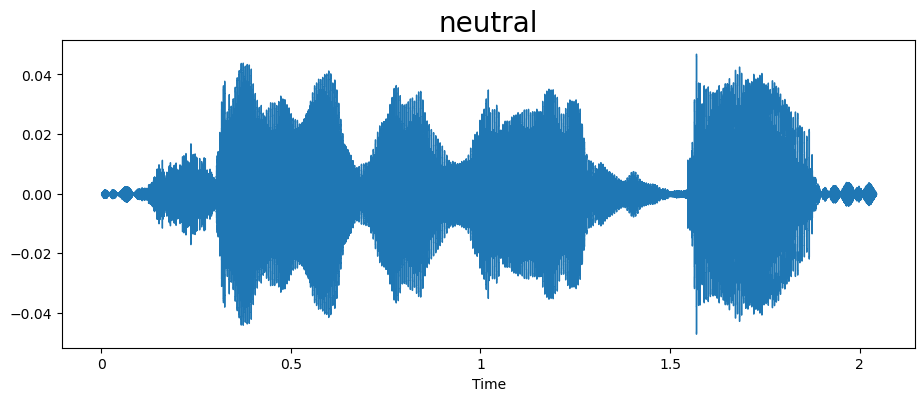

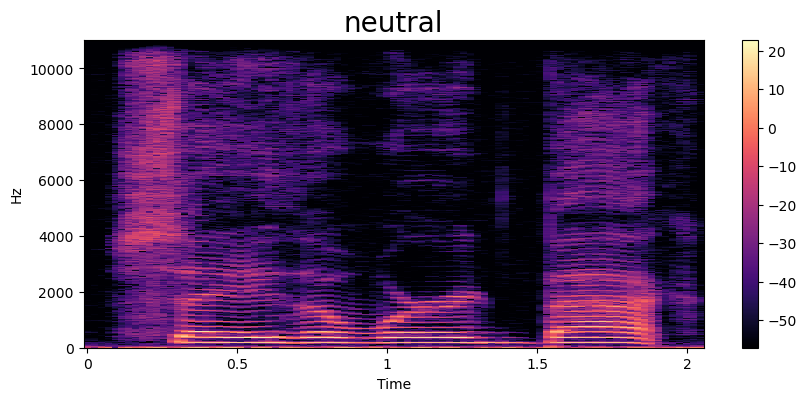

In [14]:
emotion = 'neutral'
path = df[df['label'] == emotion]['speech'].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

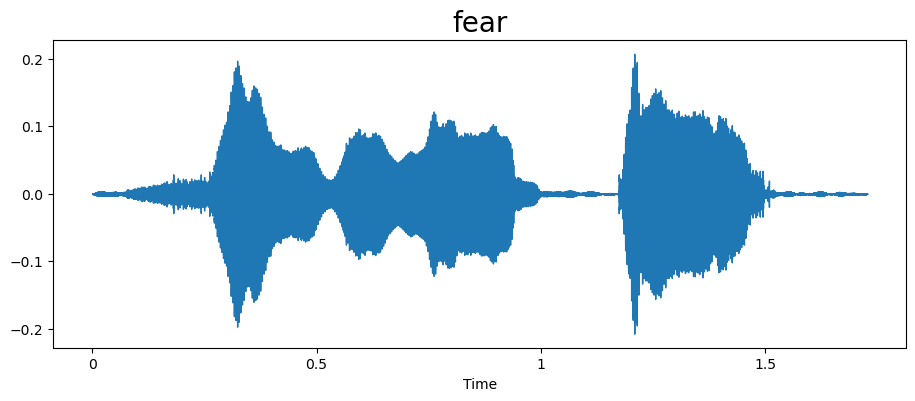

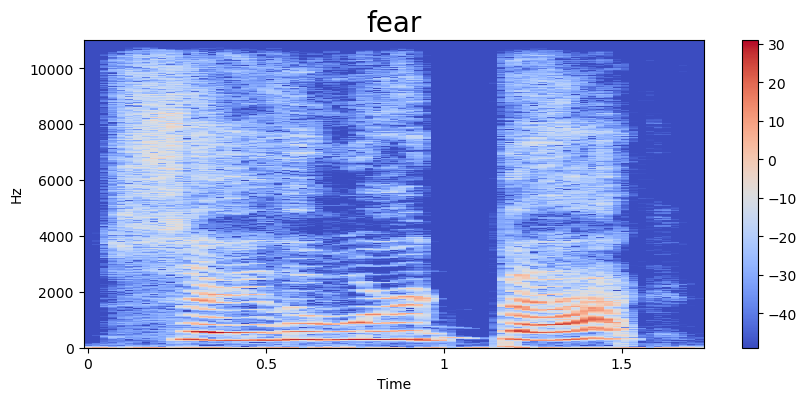

In [15]:
emotion = 'fear'
path = df[df['label'] == emotion]['speech'].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

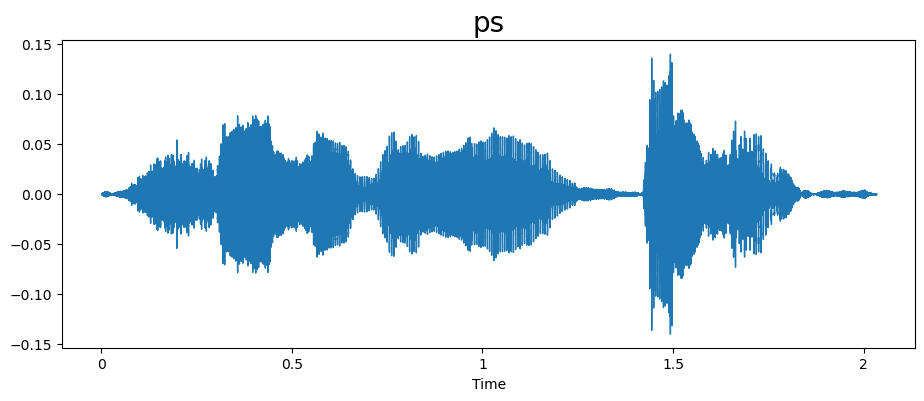

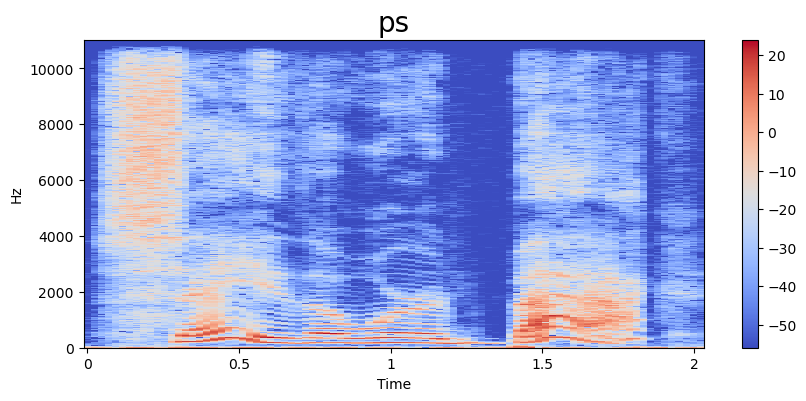

In [16]:
emotion = 'ps'
path = df[df['label'] == emotion]['speech'].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

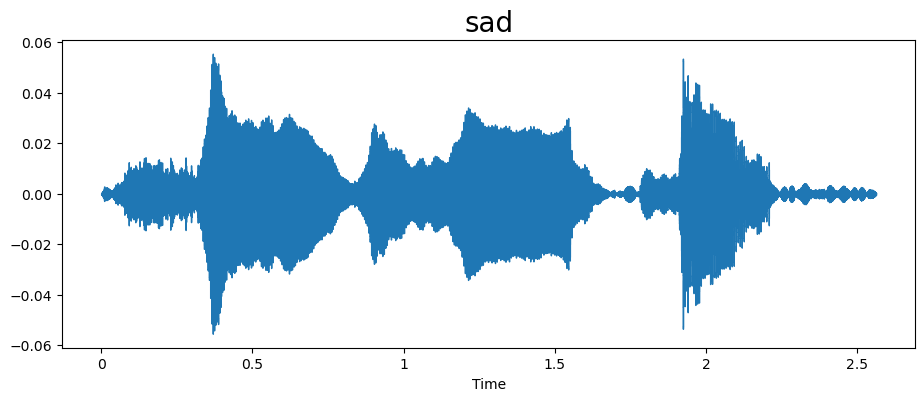

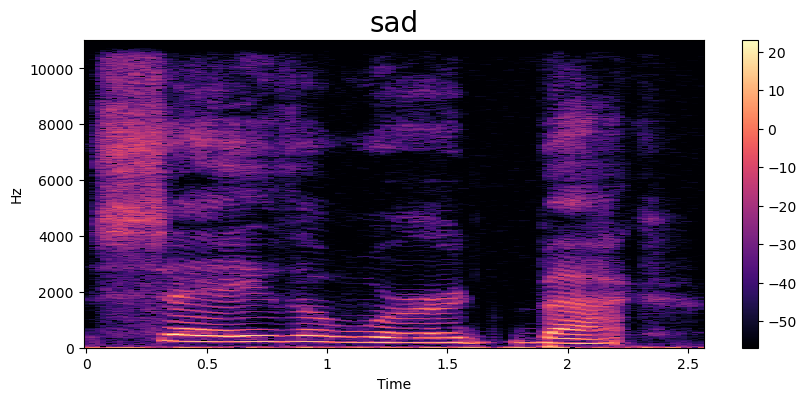

In [17]:
emotion = 'sad'
path = df[df['label'] == emotion]['speech'].values[0]
data, sampling_rate = librosa.load(path)

waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

# Convert audio sounds into a set of numbers to represent the characteristics of the sound

//describe things like pitch and loudness.

//This set of numbers is called Mel-frequency cepstral coefficients (MFCCs).

In [18]:
import librosa

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Calculating the MFCCs for the first audio sample in the table

//Mel-frequency cepstral coefficients (MFCCs) are like special numbers that help us understand and analyze sounds



In [19]:
extract_mfcc(df['speech'][0])


array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101439e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115908e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996399e+00, -1.82390714e+00,
        4.86896229e+00,  9.31392384e+00,  2.08915043e+00, -1.90649128e+00],
      dtype=float32)

In [20]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

# Calculating a set of features i.e (MFCCs) from an audio recording

In [21]:
import librosa

# Assuming 'path' and 'sampling_rate' have already been defined
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)

In [22]:
x_mfcc = mfccs

In [23]:
x_mfcc

array([[-7.1081451e+02, -6.4341858e+02, -5.6197516e+02, ...,
        -6.8844232e+02, -7.0891681e+02, -7.2560779e+02],
       [ 7.1850189e+01,  2.2049227e+01, -2.3736305e+01, ...,
         6.7036346e+01,  5.7882874e+01,  4.9399818e+01],
       [ 4.6369167e+01,  4.4708637e+01,  4.4234264e+01, ...,
        -7.3007011e+00, -1.0758460e-02,  1.0311778e+01],
       ...,
       [-2.5548456e+00, -1.7783922e+01, -1.9223240e+01, ...,
         2.2266365e+01,  1.8580257e+01,  1.8043385e+01],
       [-4.7590652e+00,  3.6116314e+00,  1.3789968e+01, ...,
         9.3115654e+00,  6.4676986e+00,  4.9846935e+00],
       [ 5.3402929e+00, -3.0540681e+00, -5.1574326e+00, ...,
         1.9060812e+00,  5.3142900e+00,  3.3357639e+00]], dtype=float32)

# Set of instructions for turning sound into special numbers that we can be used in different things

In [24]:
import numpy as np
import librosa

def extract_mfcc(filename):
    try:
        y, sr = librosa.load(filename, duration=3, offset=0.5)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None

# Assuming 'df' contains the paths to your audio files
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

# Removing None values (files that couldn't be processed)
X_mfcc = X_mfcc.dropna()

# Expanding dimensions
x = np.expand_dims(np.vstack(X_mfcc), -1)

# Checking the shape
print(x.shape)

(5600, 40, 1)


# Labels into numbers (encoding)

In [25]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming 'df' contains your data and 'label' column is the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['label'])

y = to_categorical(y_encoded)

In [26]:
y.shape

(5600, 7)

# CREATE LSTM MODEL

In [27]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77127 (301.28 KB)
Trainable params: 7712

In [28]:
#Train the model
history = model.fit(x,y,validation_split=0.2, epochs=50, batch_size=512, shuffle=True)

Epoch 1/50


9/9 [==============================] - 6s 305ms/step - loss: 1.8687 - accuracy: 0.2172 - val_loss: 1.7941 - val_accuracy: 0.3473
Epoch 2/50
9/9 [==============================] - 2s 218ms/step - loss: 1.6152 - accuracy: 0.4373 - val_loss: 1.6200 - val_accuracy: 0.4732
Epoch 3/50
9/9 [==============================] - 2s 218ms/step - loss: 1.2758 - accuracy: 0.5453 - val_loss: 1.1299 - val_accuracy: 0.5473
Epoch 4/50
9/9 [==============================] - 2s 233ms/step - loss: 0.9995 - accuracy: 0.6230 - val_loss: 0.9428 - val_accuracy: 0.5214
Epoch 5/50
9/9 [==============================] - 2s 233ms/step - loss: 0.7723 - accuracy: 0.7029 - val_loss: 0.6421 - val_accuracy: 0.6973
Epoch 6/50
9/9 [==============================] - 2s 231ms/step - loss: 0.5649 - accuracy: 0.7984 - val_loss: 0.3711 - val_accuracy: 0.8866
Epoch 7/50
9/9 [==============================] - 2s 230ms/step - loss: 0.3754 - accuracy: 0.8857 - val_loss: 0.2339 - val_accuracy: 0.9187
Epoch 8/50
9/9 [==

# PLOTTING RESULTS T0 SEE WORKING OF MODEL


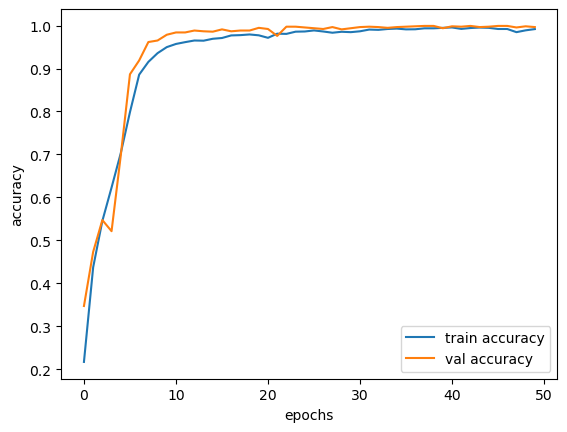

In [29]:
epochs = list(range(50)) 
loss = history.history['accuracy']  # Replace with your actual variable for training loss
val_loss = history.history['val_accuracy']  # Replace with your actual variable for validation loss

plt.plot(epochs, loss, label='train accuracy')
plt.plot(epochs, val_loss, label='val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

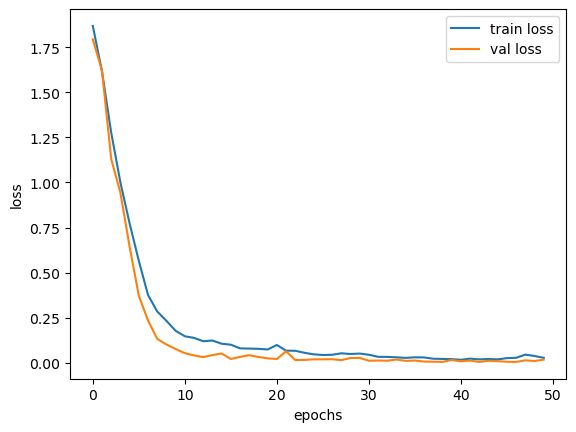

In [30]:
epochs = list(range(50)) 
loss = history.history['loss']  # Replace with your actual variable for training loss
val_loss = history.history['val_loss']  # Replace with your actual variable for validation loss

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()